<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/lidarbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/validation/lidar_box/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

In [ ]:
print(df.columns)

In [ ]:
print(df['[LiDARBoxComponent].type'])

index
30779396576054160_1880_000_1900_000;1557845072664263    2
30779396576054160_1880_000_1900_000;1557845072664263    2
30779396576054160_1880_000_1900_000;1557845072664263    4
30779396576054160_1880_000_1900_000;1557845072664263    1
30779396576054160_1880_000_1900_000;1557845072664263    1
                                                       ..
30779396576054160_1880_000_1900_000;1557845092364266    1
30779396576054160_1880_000_1900_000;1557845092364266    2
30779396576054160_1880_000_1900_000;1557845092364266    3
30779396576054160_1880_000_1900_000;1557845092364266    2
30779396576054160_1880_000_1900_000;1557845092364266    2
Name: [LiDARBoxComponent].type, Length: 24338, dtype: int8


In [ ]:
print(df['key.laser_object_id'])

index
30779396576054160_1880_000_1900_000;1557845072664263    -3eOMO08z-08xJJk7HgXeg
30779396576054160_1880_000_1900_000;1557845072664263    -9WPEJcGPjlfCzgJC5CK2A
30779396576054160_1880_000_1900_000;1557845072664263    -LzWji5byBLxqIzMY9AtLA
30779396576054160_1880_000_1900_000;1557845072664263    0ZtW7cUgRCTf4eBSyaoOSA
30779396576054160_1880_000_1900_000;1557845072664263    0gBAnTsG5GkLdZQeJiqleA
                                                                 ...          
30779396576054160_1880_000_1900_000;1557845092364266    y379h-ujL6d4tLSSJS6QAA
30779396576054160_1880_000_1900_000;1557845092364266    yZMj2TlZHg9rFR74QaNHBg
30779396576054160_1880_000_1900_000;1557845092364266    yrWnQUk19nVuVDdCF-lEKw
30779396576054160_1880_000_1900_000;1557845092364266    yyiPvNjDmFCtnph2sJ4w8Q
30779396576054160_1880_000_1900_000;1557845092364266    z_uDepjSJDkpMMwp_LbQJA
Name: key.laser_object_id, Length: 24338, dtype: object


In [ ]:
print(df['key.frame_timestamp_micros'])

index
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
30779396576054160_1880_000_1900_000;1557845072664263    1557845072664263
                                                              ...       
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
30779396576054160_1880_000_1900_000;1557845092364266    1557845092364266
Name: key.frame_timestamp_micros, Length: 24338, dtype: int64


In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/lidar_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[LiDARBoxComponent].box.size.x'].max())
height = int(df['[LiDARBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    # Check if the frame number matches the desired frame (frame 1 in this example)
    if row['key.frame_timestamp_micros'] == 1557845072664263 :
        # Get the coordinates of the box
        x1 = int(row['[LiDARBoxComponent].box.center.x'] - row['[LiDARBoxComponent].box.size.x'] / 2)
        y1 = int(row['[LiDARBoxComponent].box.center.y'] - row['[LiDARBoxComponent].box.size.y'] / 2)
        x2 = int(row['[LiDARBoxComponent].box.center.x'] + row['[LiDARBoxComponent].box.size.x'] / 2)
        y2 = int(row['[LiDARBoxComponent].box.center.y'] + row['[LiDARBoxComponent].box.size.y'] / 2)

        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')

# Show the image with bounding boxes
img.show()

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/lidar_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[LiDARBoxComponent].box.size.x'].max())
height = int(df['[LiDARBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
    # Check if the frame number matches the desired frame (frame 1 in this example)
    if row['key.frame_timestamp_micros'] == 1557845072664263:
        # Get the coordinates of the box
        x1 = int(row['[LiDARBoxComponent].box.center.x'] - row['[LiDARBoxComponent].box.size.x'] / 2)
        y1 = int(row['[LiDARBoxComponent].box.center.y'] - row['[LiDARBoxComponent].box.size.y'] / 2)
        x2 = int(row['[LiDARBoxComponent].box.center.x'] + row['[LiDARBoxComponent].box.size.x'] / 2)
        y2 = int(row['[LiDARBoxComponent].box.center.y'] + row['[LiDARBoxComponent].box.size.y'] / 2)

        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')

# Resize the image to the desired size
resized_img = img.resize((800, 600))

# Show the resized image with bounding boxes
resized_img.show()

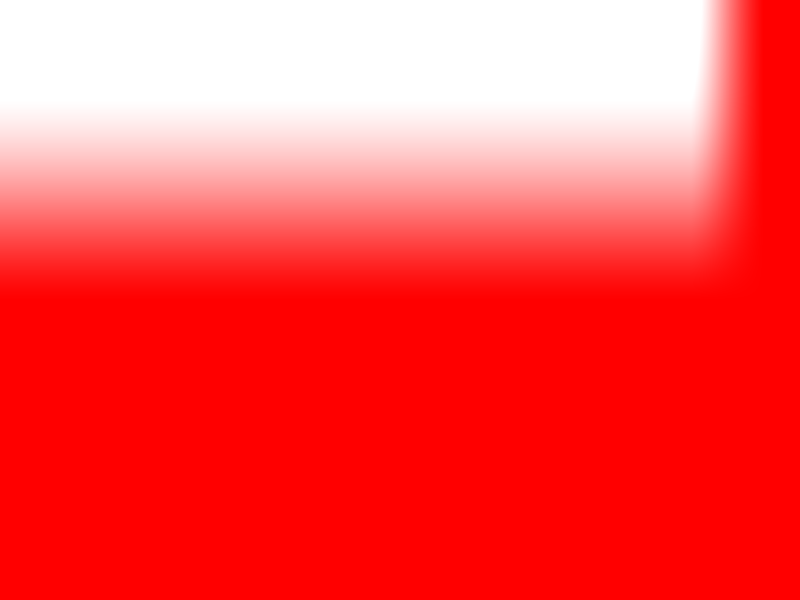

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the camera box data from parquet file
df = pd.read_parquet('/content/drive/MyDrive/validation/lidar_box/file1.parquet')

# Get the camera resolution from the data
width = int(df['[LiDARBoxComponent].box.size.x'].max())
height = int(df['[LiDARBoxComponent].box.size.y'].max())

# Create a blank image of the same size as the camera resolution
img = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(img)

# Loop through each bounding box in the data and draw it on the image
for index, row in df.iterrows():
        # Get the coordinates of the box
        x1 = int(row['[LiDARBoxComponent].box.center.x'] - row['[LiDARBoxComponent].box.size.x'] / 2)
        y1 = int(row['[LiDARBoxComponent].box.center.y'] - row['[LiDARBoxComponent].box.size.y'] / 2)
        x2 = int(row['[LiDARBoxComponent].box.center.x'] + row['[LiDARBoxComponent].box.size.x'] / 2)
        y2 = int(row['[LiDARBoxComponent].box.center.y'] + row['[LiDARBoxComponent].box.size.y'] / 2)

        # Draw the bounding box on the image
        draw.rectangle((x1, y1, x2, y2), outline='red')

# Resize the image to the desired size
resized_img = img.resize((800, 600))

# Show the resized image with bounding boxes
resized_img.show()

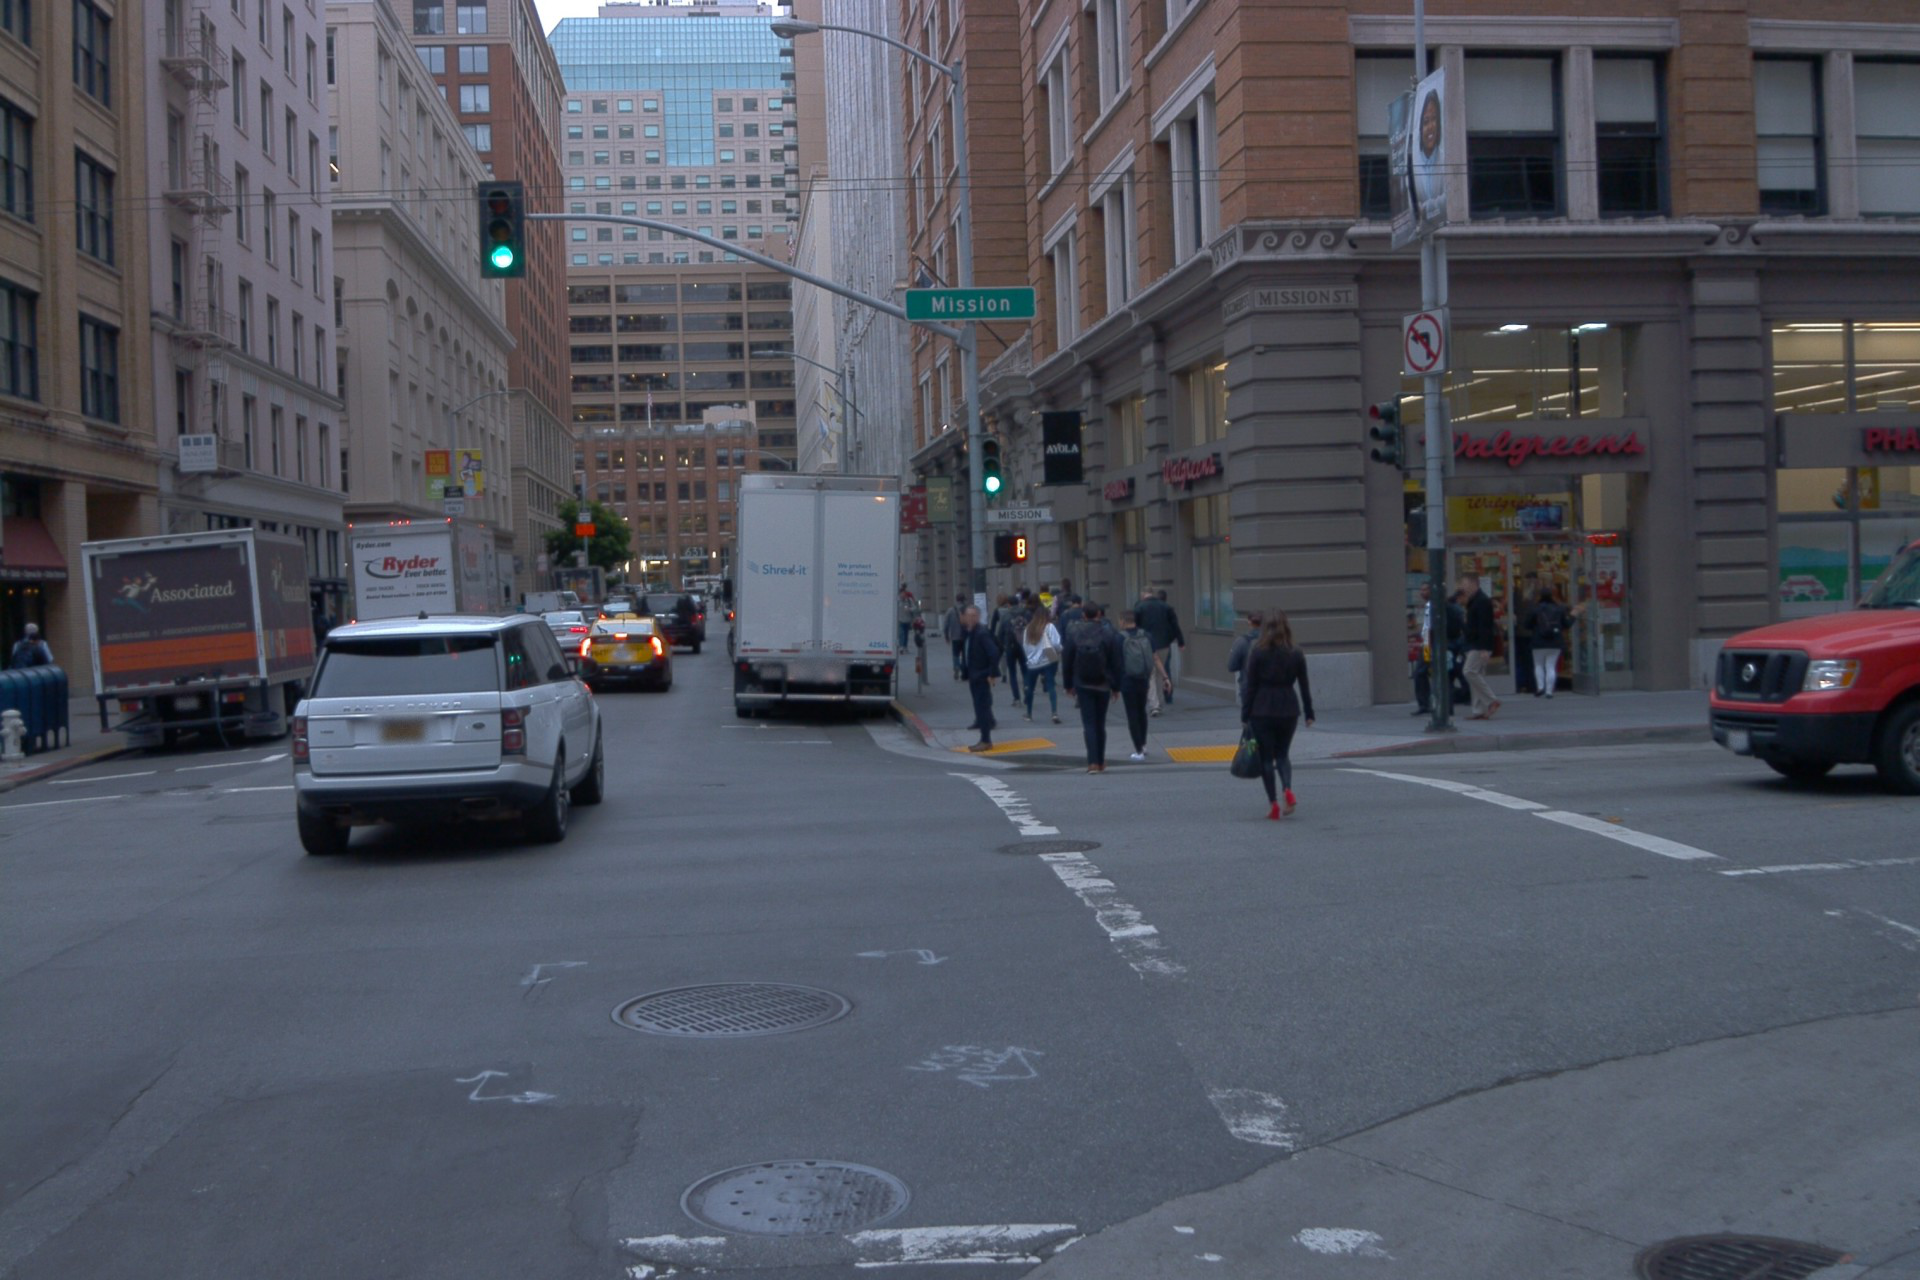

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Load the camera image data from the parquet file
df_camera_image = pd.read_parquet('/content/drive/MyDrive/validation/camera_image/file1.parquet')

# Load the Lidar box data from the parquet file
df_lidar_box = pd.read_parquet('/content/drive/MyDrive/validation/lidar_box/file1.parquet')


# Set the desired frame timestamp
frame_timestamp = 1557845092364266

# Find the row in the camera image DataFrame that corresponds to the desired frame timestamp
df_camera_image_frame = df_camera_image[df_camera_image['key.frame_timestamp_micros'] == frame_timestamp]

# Read the camera image binary data into a stream
camera_image_stream = BytesIO(df_camera_image_frame.iloc[0]['[CameraImageComponent].image'])

# Open the image using PIL
camera_image = Image.open(camera_image_stream)

# Calculate the scaling factors for Lidar to camera image mapping
scaling_factor_x = camera_image.width / max(df_lidar_box['[LiDARBoxComponent].box.size.x'])
scaling_factor_y = camera_image.height / max(df_lidar_box['[LiDARBoxComponent].box.size.y'])

# Create a blank image with the same size as the camera image
lidar_overlay = Image.new('RGBA', camera_image.size, (0, 0, 0, 0))
draw = ImageDraw.Draw(lidar_overlay)

# Filter the Lidar boxes based on type and laser_object_id
filtered_boxes = df_lidar_box[(df_lidar_box['[LiDARBoxComponent].type'] == 1) & (df_lidar_box['key.laser_object_id'] == 'y379h-ujL6d4tLSSJS6QAA')]

# Loop through the filtered Lidar boxes and draw a rectangle on the overlay image
for index, row in filtered_boxes.iterrows():
    lidar_x = row['[LiDARBoxComponent].box.center.x']
    lidar_y = row['[LiDARBoxComponent].box.center.y']
    lidar_width = row['[LiDARBoxComponent].box.size.x']
    lidar_height = row['[LiDARBoxComponent].box.size.y']
    
    # Map Lidar coordinates and dimensions to camera image coordinates based on the scaling factors
    camera_x = int((lidar_x - lidar_width / 2) * scaling_factor_x)
    camera_y = int((lidar_y - lidar_height / 2) * scaling_factor_y)
    camera_width = int(lidar_width * scaling_factor_x)
    camera_height = int(lidar_height * scaling_factor_y)
    
    # Draw a rectangle on the overlay image
    draw.rectangle((camera_x, camera_y, camera_x + camera_width, camera_y + camera_height), outline='red')

# Merge the camera image and the Lidar overlay
result_image = Image.alpha_composite(camera_image.convert('RGBA'), lidar_overlay)

# Show the resulting image
result_image.show()